In [1]:
import pygetwindow as pgw
from PIL import ImageGrab,Image
import pyautogui as pag
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import time
from datetime import datetime
import re
import pytesseract as tess
import subprocess

In [13]:
# define global variable
class Config:
  # window settings
  WIN_INIT_X = 0
  WIN_INIT_Y = 0
  WIN_WIDTH = 944
  WIN_HEIGHT = 540

  # position of 10 rewards inside the Repeat Battle
  RB_POS_REWARD = {
    0 : (600,250),
    1 : (669,250),
    2 : (738,250),
    3 : (807,250),
    4 : (600,319),
    5 : (669,319),
    6 : (738,319),
    7 : (807,319),
    8 : (600,388),
    9 : (669,388)
  }

In [20]:
def resize() -> tuple:
  """
  Resize windows to design specs and positions
  """
  win = pgw.getWindowsWithTitle('BlueStacks')[0]
  win.maximize()
  win.moveTo(Config.WIN_INIT_X,Config.WIN_INIT_Y)
  win.size = (Config.WIN_WIDTH,Config.WIN_HEIGHT)
  dim = win.size
  return dim

In [21]:
resize()

Size(width=944, height=540)

In [15]:
resize()

Size(width=944, height=540)

In [6]:
def display_img(img,cmap=None):
    win_width = dim[0]
    win_height = dim[1]
    fig = plt.figure(figsize=(15*win_width/win_height,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap)

In [7]:
# https://stackoverflow.com/questions/4993082/how-can-i-sharpen-an-image-in-opencv
def unsharp_mask(image, kernel_size=(5, 5), sigma=1.0, amount=1.0, threshold=0):
    """Return a sharpened version of the image, using an unsharp mask."""
    blurred = cv.GaussianBlur(image, kernel_size, sigma)
    sharpened = float(amount + 1) * image - float(amount) * blurred
    sharpened = np.maximum(sharpened, np.zeros(sharpened.shape))
    sharpened = np.minimum(sharpened, 255 * np.ones(sharpened.shape))
    sharpened = sharpened.round().astype(np.uint8)
    if threshold > 0:
        low_contrast_mask = np.absolute(image - blurred) < threshold
        np.copyto(sharpened, image, where=low_contrast_mask)
    return sharpened

In [8]:
# https://stackoverflow.com/questions/2846947/get-screenshot-on-windows-with-python
def get_app_window():
    ss = pag.screenshot()
    ss = np.asarray(ss)
    ss = unsharp_mask(ss)
    roi = ss[:dim[1],:dim[0],:]
    return roi

In [9]:
pic = get_app_window()

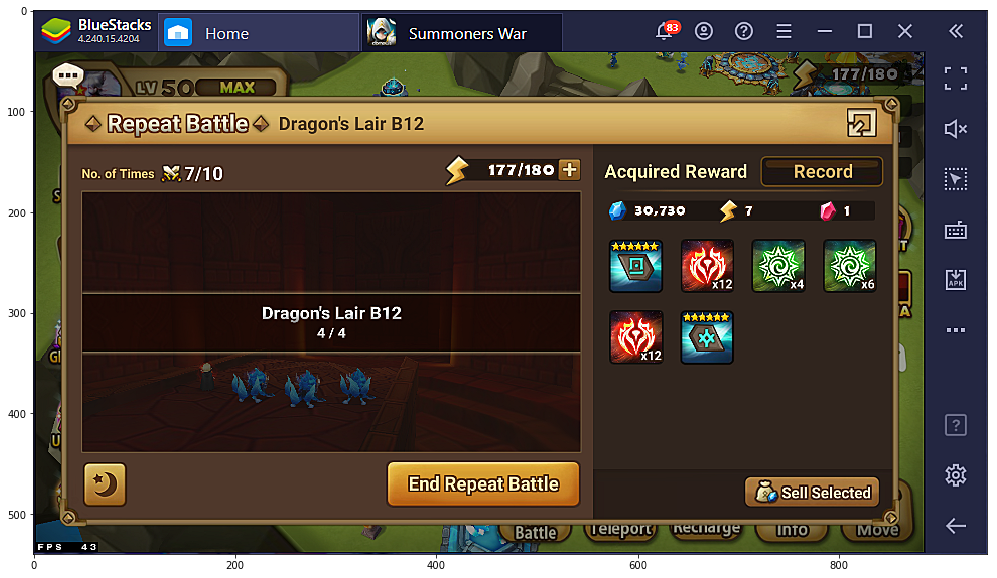

In [10]:
display_img(pic)

In [11]:
pic.shape

(540, 947, 3)

In [ ]:
def compare(target,source,method=cv.TM_CCOEFF):
    # The Full Image to Search
    src_img = cv.cvtColor(source, cv.COLOR_BGR2RGB)

    # The Template to Match
    target_img = cv.cvtColor(target, cv.COLOR_BGR2RGB)

    # Apply template Matching with the method
    res = cv.matchTemplate(src_img,target_img,method)

    # Grab the Max and Min values, plus their locations
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    top_left = max_loc
    
    return top_left

In [12]:
pic.shape

(540, 947, 3)

In [13]:
win.size

Size(width=947, height=540)

In [14]:
pos_reward = {
'pos_0' : (600,250),
'pos_1' : (669,250),
'pos_2' : (738,250),
'pos_3' : (807,250),
'pos_4' : (600,319),
'pos_5' : (669,319),
'pos_6' : (738,319),
'pos_7' : (807,319),
'pos_8' : (600,388),
'pos_9' : (669,388)
}


In [10]:
pag.moveTo(600,250)

In [8]:
Config.POS_REWARD[0]

(600, 250)

In [28]:
RepeatBattleConfig.POS_REWARD[9]

(669, 388)

In [30]:
pag.click(RepeatBattleConfig.POS_REWARD[9])

In [ ]:
def click()

In [151]:
pag.click(600,388)

In [ ]:
'px_0' : (239,564)

In [143]:
pag.click(649,239)

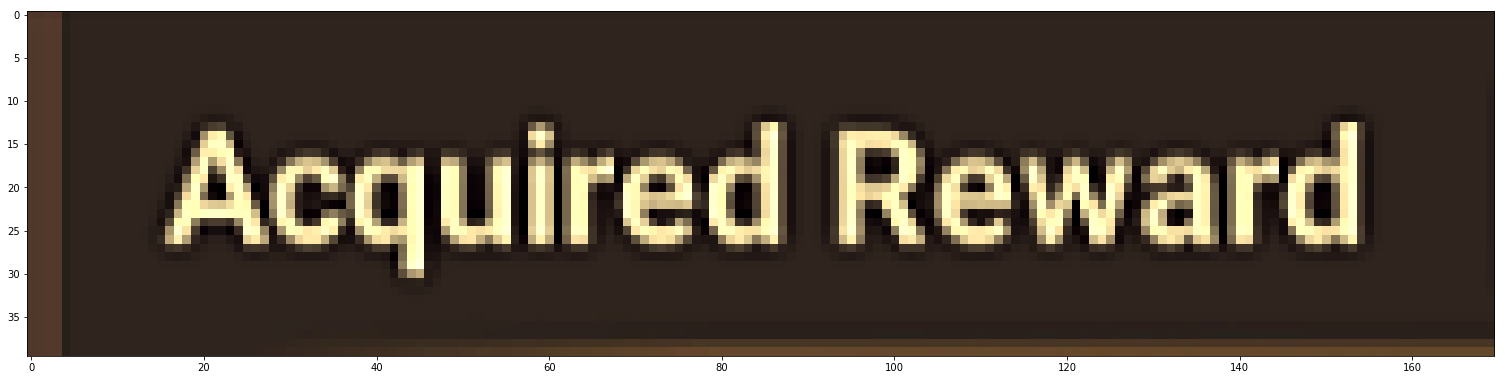

In [57]:
display_img(pic[140:180,550:720])

In [58]:
pic_acquired_reward = pic[140:180,550:720].copy()

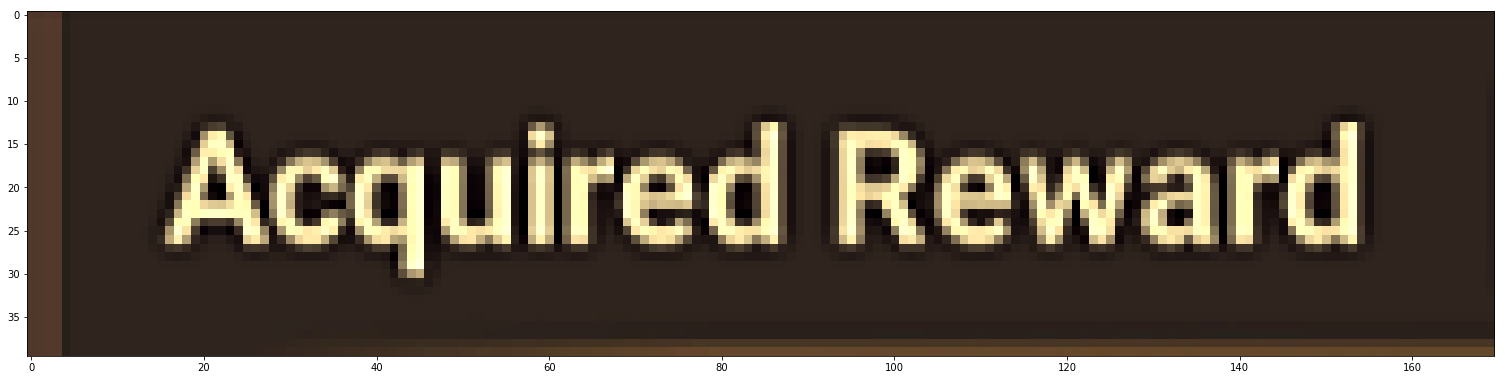

In [59]:
display_img(pic_acquired_reward)

In [60]:
def compare(target,source,method=cv.TM_CCOEFF):
    # The Full Image to Search
    src_img = cv.cvtColor(source, cv.COLOR_BGR2RGB)

    # The Template to Match
    target_img = cv.cvtColor(target, cv.COLOR_BGR2RGB)

    # Apply template Matching with the method
    res = cv.matchTemplate(src_img,target_img,method)

    # Grab the Max and Min values, plus their locations
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    top_left = max_loc
    
    return top_left

In [68]:
compare(pic_acquired_reward,pic)

(29, 142)